# Programación 201

# NBA player of the week

### Ejercicio 1

# Descripción y enunciado
El objetivo de esta actividad es la gestión y preparación de datos. La gestión de datos es una parte muy importante de cualquier proceso de minería de datos, ya que los datos se deben preparar y preprocesar antes de iniciar el proceso de extracción de conocimiento.
Esta tarea ilustra algunos de los procedimientos básicos con los que nos podemos encontrar para preparar los datos: analizar los tipos de datos, tranformar valores, detectar e eliminar outliers, hacer un muestreo, etcétera.

# Fichero de datos
El conjunto de datos con el que trabajaremos en esta actividad surge de la bases de datos disponibles en Kaggle . En concreto, los datos corresponden a los jugadores nombrados jugadores de la semana desde la temporada 1984-1985 hasta la temporada 2017-2018. Estos datos nos ofrecen múltiples posibilidades para consolidar los conocimientos y competencias de manipulación de datos, preprocesado y análisis descriptivo. El fichero `NBA_player_of_the_week.csv` se encuentra adjunto.


# Ingesta de datos
Actualmente el fichero se encuentra en la misma carpeta de datos RMD, está en adjunto. Se enviará nueva práctica similar con los datos de ingesta a través de scraping / API / base de datos para R y Python.


# Valoraciones
- se valorarán los trabajos por los detalles, no vale con el solo enviar un trozo de código, sino la explicación es fundamental
- explicar además los resumen de cada sección (carga, preparación, EDA, limpieza, nuevos atributos, discretización, split train-test)
- conclusiones y comparativas son los más importantes para comenzar con Data Mining.

### 1) Cargar un juego de datos 

`Librerías:`

In [1]:
import pandas as pd
import numpy as np

`Carga de datos:`

In [2]:
nba = pd.read_csv("NBA_player_of_the_week.csv")

### 2) Descripción de los datos

Describir brevemente la estructura de los datos: qué tipo de datos contiene, número de filas y columnas y nombre de las columnas. Realizar un resumen descriptivo de los datos.

In [3]:
# Tipo de datos que contiene
type(nba)

pandas.core.frame.DataFrame

In [4]:
# Observamos el tipo de dato por dimensión
nba.dtypes

Age                    int64
Conference            object
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
dtype: object

In [5]:
# Número de filas:
print("- El dataframe 'NBA_player_of_the_week' contiene: {} filas".format(len(nba)))
# Nombre de columnas:
print("- Nombres de las columnas : {}".format(nba.columns.values))

- El dataframe 'NBA_player_of_the_week' contiene: 1145 filas
- Nombres de las columnas : ['Age' 'Conference' 'Date' 'Draft Year' 'Height' 'Player' 'Position'
 'Season' 'Season short' 'Seasons in league' 'Team' 'Weight' 'Real_value']


In [6]:
# Estadísticas básicas: 
nba.describe()

,Age,Draft Year,Season short,Seasons in league,Real_value
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,26.772926,1997.244541,2004.211354,5.869869,0.667686
std,3.402354,9.381369,9.426976,3.271995,0.236163
min,19.000000,1969.000000,1985.000000,0.000000,0.500000
25%,24.000000,1990.000000,1997.000000,3.000000,0.500000
50%,26.000000,1998.000000,2006.000000,6.000000,0.500000
75%,29.000000,2004.000000,2012.000000,8.000000,1.000000
max,40.000000,2016.000000,2018.000000,17.000000,1.000000


### 3) Preparación de la base de datos
#### 3.1 Asignar NA a los valores ausentes en los datos de `Conference`.

In [7]:
# Reviso los valores ausentes por Variable
nba.isna().sum()

Age                    0
Conference           384
Date                   0
Draft Year             0
Height                 0
Player                 0
Position               0
Season                 0
Season short           0
Seasons in league      0
Team                   0
Weight                 0
Real_value             0
dtype: int64

In [8]:
# Reviso los valores que componen la variable Conference
nba.Conference.value_counts(dropna = False)

NaN     384
East    381
West    380
Name: Conference, dtype: int64

In [9]:
# Al no haber valores automáticamente se generean NaN , sin embargo voy a asignar el valor NA a cada uno de ellos:
nba.Conference.fillna("Na", inplace=True)

In [10]:
# Realizamos la comprobación de que la asignación ha sido correcta
print(nba.Conference.unique())

['Na' 'East' 'West']


#### 3.2 Transformar los datos de Conference en variable categórica y mostrar la tabla de frecuencia.

In [11]:
# Transformación de los datos de `Conference`
nba["Conference"] = nba.Conference.astype("category")
# Comprobamos la transformación
nba.Conference.dtypes

CategoricalDtype(categories=['East', 'Na', 'West'], ordered=False)

In [12]:
# Tabla de frecuencia
nba.Conference.value_counts()

Na      384
East    381
West    380
Name: Conference, dtype: int64

#### 3.3 Comprobar que la variable tiene xxx valores ausentes

In [13]:
# Recordemos que los valores ausentes fueron sustituidos por "Na"
nba.groupby(['Conference'])['Conference'].count()

Conference
East    381
Na      384
West    380
Name: Conference, dtype: int64

#### 3.4 Transformar las variables Height, Player, Position, Season, Team y Weight en variables categóricas.

In [14]:
nba["Height"] = nba.Height.astype("category")
nba["Player"] = nba.Player.astype("category")
nba["Position"] = nba.Position.astype("category")
nba["Season"] = nba.Season.astype("category")
nba["Team"] = nba.Team.astype("category")
nba["Weight"] = nba.Weight.astype("category")

#### 3.5 Comprobar que estas variables no tienen valores perdidos.

In [15]:
# Comprobamos que las variables transformadas no contengan valores perdidos tras realizar la suma de los elementos
nba[["Height", "Player", "Position", "Season", "Team", "Weight"]].isna().sum()

Height      0
Player      0
Position    0
Season      0
Team        0
Weight      0
dtype: int64

#### 3.6 Calcular el número de anyos que pasan entre que salio el jugador elegido en el draft y la temporada en la que fue jugador de la semana. Denomina la variable tiempo

In [16]:
nba["Tiempo"] = nba["Season short"] - nba["Draft Year"]

In [17]:
# Traemos las variables involucradas y comprobamos
nba[["Season short", "Draft Year", "Tiempo"]].head(10)

,Season short,Draft Year,Tiempo
0,1985,1978,7
1,1985,1982,3
2,1985,1979,6
3,1985,1969,16
4,1985,1978,7
5,1985,1980,5
6,1985,1982,3
7,1985,1981,4
8,1985,1979,6
9,1985,1982,3


####  3.7 ¿Cual es el número de años que más veces se repite entre que salen elegidos en el draft y se proclaman mejores jugadores? (moda de la variable tiempo)

In [18]:
# Podemos observar que el año que más se repite es:
nba.Tiempo.mode()

0    7
dtype: int64

#### 3.8 La altura de los jugadores está expresada en pies (aquellas con guión) y cm. Convertir la altura expresada en pies a centimetros (https://www.piesametros.info/](https://www.piesametros.info/). Posteriormente, eliminar el texto “cm” de los datos de tipo altura y convertir la variable en numérica. Calcular media, desviación típica y boxplot.

In [19]:
# Realizamos la conversión de la variable:
nba.Height = nba.Height.astype(str)

#Iteramos:
for i in range(len(nba['Height'])):
    # Si encuentra un '-' entonces vamos a crear una variable en la cual almacenaremos la separación pies y pulgadas
    if "-" in nba['Height'][i]:
        Variable = nba['Height'][i].split("-")
        # Aplicaremos la conversión de pies y pulgadas a centímetros y redondeamos el resultado y
        # realizaremos la correspondiente asignacion
        nba.loc[i, 'Height'] = round(int(Variable[0]) * 30.48 + (int(Variable[1]) * 2.54),0)
    elif "cm" in nba['Height'][i]:
        #En donde encontremos 'cm' haremos un reemplazo
        nba.loc[i, 'Height'] = nba['Height'][i].replace("cm", "")
# Para poder realizar operaciones luego de haber depurado la data convertimos la variable a numerica     
nba.Height = nba.Height.astype('float')


In [20]:
# Realizamos el cálculo de la media y la desviación típica
nba.Height.agg(['mean','std'])

mean    200.992140
std       9.468337
Name: Height, dtype: float64

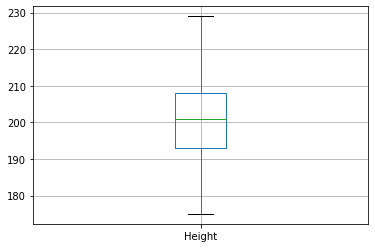

In [21]:
# Boxplot
nba.boxplot(column=['Height'])

#### 3.9 El peso de los jugadores está expresada en libras y kg. Convertir el peso expresado en kgs en libras [https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm](https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm). Convertir la variable en numérica.Calcular media, desviación típica y boxplot.

In [23]:
# Realizamos la conversión de la variable:
nba.Weight = nba.Weight.astype(str)
# 1) Remover 'Kg'
# 2) convertir los pesos expresados en Kgs a libras
# Iteramos
for i in range(len(nba['Weight'])):
    # 1 Kg = 2.205 Libras
    # Al momento de encontrar 'kg' realizaremos un reemplazo y procederemos a convertir los kg en libras
    if 'kg' in nba['Weight'][i]:
        nba.loc[i,'Weight'] = int(nba['Weight'][i].replace('kg','')) *2.20    
#Los valores que no estén acompañados con el str 'kg' se encuentran expresados en libras por lo que no haremos ninguna conversión  

In [24]:
# Para poder realizar operaciones luego de haber depurado la data convertimos la variable a numerica     
nba.Weight = nba.Weight.astype('float')

In [25]:
# Realizamos el cálculo de la media y la desviación típica
nba.Weight.agg(['mean','std'])

mean    225.967162
std      31.578248
Name: Weight, dtype: float64

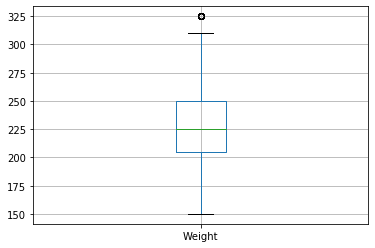

In [26]:
# Boxplot
nba.boxplot(column=['Weight'])

### 4 Información sobre posiciones en el campo y equipos.
#### 4.1 Fusionar las categorias de posición en el campo F,F-C y FC en la categoría genérica Forward. Fusionar las categorias G,G-F y GF en la categoria genérica Guard. Renombrar la categoría ‘PG’ como ‘Point Guard’, ‘SG’ como ‘Shooting Guard’, ‘SF’ como ‘Small Forward’, ‘PF’ como ‘Power Forward’ y ‘C’ como ‘Center’.

In [32]:
nba.Position.value_counts()

G      178
SG     164
C      158
PF     139
F      125
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64

In [42]:
# Lo haremos a través de la función replace, accediendo a través de un dict:
nba = nba.replace({"Position":
                {"G": "Guard", "G-F": "Guard", "GF": "Guard",
                 "F": "Forward", "F-C":"Forward", "FC": "Forward",
                 "PG":"Point Guard", 
                 "SG":"Shooting Guard",
                 "SF": "Small Forward",
                 "PF": "Power Forward",
                 "C": "Center"}})
# si nos pidieran renombrar columnas :nba.rename(columns={'A': 'bla', 'B': 'bla', 'C': 'bla'}
# Verificamos
nba['Position'].unique()

array(['Point Guard', 'Shooting Guard', 'Forward', 'Center',
       'Small Forward', 'Power Forward', 'Guard'], dtype=object)

#### 4.2 ¿En que posición ha sido más veces los jugadores de la semana nombrados?

In [37]:
nba.Position.mode()

0    Guard
dtype: object

#### 4.3 ¿Cuántos equipos distintos hay?

In [39]:
len(nba["Team"].unique())

35

#### 4.4 ¿Cuáles son los cinco equipos que más veces han sido nombrados sus jugadores como jugador de la semana?

In [43]:
(nba.Team.value_counts()).head(5)

Los Angeles Lakers     71
San Antonio Spurs      61
Cleveland Cavaliers    59
Miami Heat             57
Houston Rockets        56
Name: Team, dtype: int64

### 5 Información sobre jugadores. Estadísticos descriptivos.
#### 5.1 Crear una base datos denominada nba.unique en la que no se repita el nombre de ningún jugador.Trabajar a partir de ahora con esta base de datos.

In [44]:
nba_unique = nba.drop_duplicates("Player")

In [51]:
print(nba_unique.shape)
nba_unique.head()


(274, 14)


,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Tiempo
0,29,Na,"Apr 14, 1985",1978,196.0,Micheal Ray Richardson,Point Guard,1984-1985,1985,6,New Jersey Nets,189.0,1.0,7
1,23,Na,"Apr 7, 1985",1982,198.0,Derek Smith,Shooting Guard,1984-1985,1985,2,Los Angeles Clippers,205.0,1.0,3
2,28,Na,"Apr 1, 1985",1979,198.0,Calvin Natt,Forward,1984-1985,1985,5,Denver Nuggets,220.0,1.0,6
3,37,Na,"Mar 24, 1985",1969,218.0,Kareem Abdul-Jabbar,Center,1984-1985,1985,15,Los Angeles Lakers,225.0,1.0,16
4,28,Na,"Mar 17, 1985",1978,206.0,Larry Bird,Small Forward,1984-1985,1985,5,Boston Celtics,220.0,1.0,7


#### 5.2 Listar el nombre de los 10 jugadores más bajos que han sido nombrados alguna vez jugadores de la semana. No debe repetirse ningún nombre.

In [58]:
(nba_unique[['Player','Height']].sort_values(by='Height', ascending = True)).head(10)

,Player,Height
967,Isaiah Thomas,175.0
893,Nate Robinson,175.0
110,Michael Adams,178.0
858,Ty Lawson,180.0
273,Terrell Brandon,180.0
125,Tim Hardaway,183.0
278,Allen Iverson,183.0
219,Kenny Anderson,183.0
251,Elliot Perry,183.0
586,Chris Paul,183.0


#### 5.3 Listar el nombre de los 10 jugadores más altos que han sido nombrados y mostrar su altura. No debe repetirse ningún nombre.

In [59]:
(nba_unique[['Player','Height']].sort_values(by='Height', ascending = False)).head(10)

,Player,Height
486,Yao Ming,229.0
236,Rik Smits,224.0
1139,Kristaps Porzingis,221.0
483,Zydrunas Ilgauskas,221.0
256,Arvydas Sabonis,221.0
3,Kareem Abdul-Jabbar,218.0
188,Dikembe Mutombo,218.0
206,Shaquille O'Neal,216.0
868,Marc Gasol,216.0
115,David Robinson,216.0


### 6 Eliminación de outliers.
#### 6.1 Eliminar los outliers de la variable peso (Weight) y guardar en un data frame nba.avg

#### 6.2 Comparar los boxplots de los datos originales en nba.unique y de los datos del peso de nba.avg

#### 6.3 Interpretar los resultados

### 7 Clasificación de jugadores
#### 7.1 Añadir una columna al conjunto de datos denominada “Altura” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende de la altura de cada jugador. Se asigna:
- bajo: los 50 jugadores más bajos
- alto: los 50 jugadores más altos
- normal: el resto de jugadores

#### 7.2 Añadir una columna al conjunto de datos denominada “Peso” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende del peso de cada jugador. Se asigna:
- bajo: los 50 jugadores con menor peso
- alto: los 50 jugadores con mayor peso
- normal: el resto de jugadores

#### 7.3 Calcular la media y desviación típica del peso (Weight) según la clasificación de altura de los jugadores.

#### 7.4 Realizar un boxplot del peso (Weight) según la clasificación de altura del jugador. Los boxplots deben estar ordenados de menos a mayor altura.

#### 7.5 Hacer un listado con el nombre de jugadores que tienen una altura ‘normal’ y un peso ‘alto’. Ordenar alfabéticamente por nombre.